## Import Data and Library

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

### Import Data

In [19]:
with ZipFile('big-startup-secsees-fail-dataset-from-crunchbase.zip') as raw_zip:
    raw_zip.extractall(path='datasets')
    
    raw_data = pd.read_csv('datasets/big_startup_secsees_dataset.csv')

In [20]:
raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


## Data Inspection

### Total Amount of Rows and Columns

In [4]:
raw_data.shape

(66368, 14)

### Data Fields

In [5]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

#### Data Fields Information
1. permalink: Link to Organization
2. name: Company Name
3. homepage_url: Startup Site
4. category_list: Field of company
5. funding_total_usd: Total Funding in USD
6. status: Operating Status
7. country_code: Country Code
8. state_code: State Code of company location
9. region: Region of company location
10. city: Cit of company location
11. funding_rounds: the number of times a startup opts to raise capital from the market.
12. founded_at: the date when the startup is founded
13. first_funding_at: the date when the startup get first funding
14. last_funding_at: the date when the startup get last funding

### Check Duplicate Startup Name

In [6]:
check_name = raw_data['name'].value_counts()

check_name[check_name > 1]

Blink     4
Peach     4
Spire     4
Roost     4
Karma     4
         ..
Stream    2
Shift     2
Splore    2
Euclid    2
Weave     2
Name: name, Length: 239, dtype: int64

There are 239 duplicated startup name, lets check wheter the startup has the same name or the data is just duplicated by checking the permalink column.

In [7]:
duplicate_name = check_name[check_name > 1].index

duplicate_inspect = raw_data[raw_data['name'].str.fullmatch('|'.join(duplicate_name)) == True]

duplicate_inspect[['permalink', 'name']]

,permalink,name
281,/organization/3divaz-2,3DIVAZ
282,/organization/3divaz-3,3DIVAZ
1526,/organization/adtena,Adtena
1527,/organization/adtena-2,Adtena
1995,/organization/agora-3,Agora
...,...,...
65799,/organization/zenpayroll,Gusto
65897,/organization/zesty,Zesty
65899,/organization/zestyapp,Zesty
66028,/organization/zingbox,ZingBox


Lets check the uniqueness of permalink column.

In [8]:
duplicate_inspect[['permalink', 'name']].nunique()

permalink    502
name         238
dtype: int64

The permalink is unique! However, one thing that bother me is that some of the duplicated startup name have similiar permalink, for example '3DIVAZ' startup have permalink '/organization/3divaz-2' and '/organization/3divaz-3', it could be that the data was inputed two times and the permalink is set to unique in the beginning, hence it automatically iterate the permalink name if the input data is same. But it is just speculation, we don't have enough information about the data. So for now lets assume these startup coincidentally have the same name.

### Check Data Types

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


The funding_total_usd data type is wrong, it should be float. Lets check how many data that have '-' element.

In [36]:
(raw_data['funding_total_usd'] == '-').value_counts()

False    53583
True     12785
Name: funding_total_usd, dtype: int64

In [37]:
raw_data['funding_total_usd'] = pd.to_numeric(
    arg=raw_data['funding_total_usd'],
    errors='coerce',
    downcast='float'
)

raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


Lets check again the NaN value after the conversion.

In [50]:
raw_data['funding_total_usd'].isna().value_counts()

False    53583
True     12785
Name: funding_total_usd, dtype: int64

It same! we can conclude that all non-numeric data is '-' not number with string (e.g. 10 mil usd).

## Visualize Data Distribution

### Numeric Data

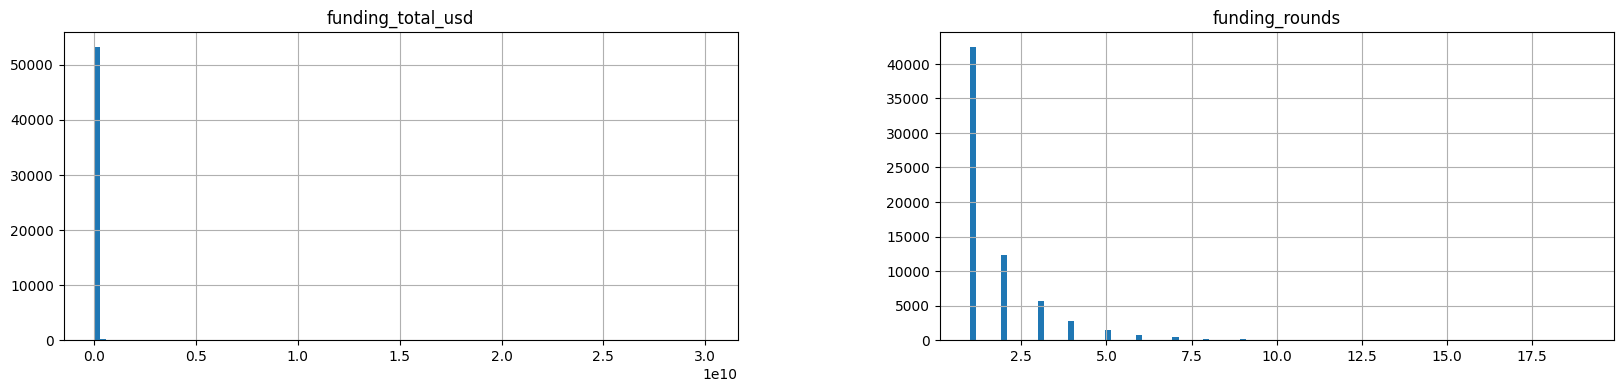

In [51]:
raw_data.hist(bins=100, figsize=(20, 4))

plt.show()

The funding_total_usd column distribution is hard to see, since it has a lot of outliers. So lets inspect the funding_total_usd column.

In [53]:
raw_data['funding_total_usd'].describe()

count    5.358300e+04
mean     1.847860e+07
std      1.880133e+08
min      1.000000e+00
25%      3.356235e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

The minimum value is 1 usd, which is doesn't make any sense, there is no way someone is funding a startup by 1 usd (it could be an invalid input). Lets check it further by using interquartile rule to find outliers.
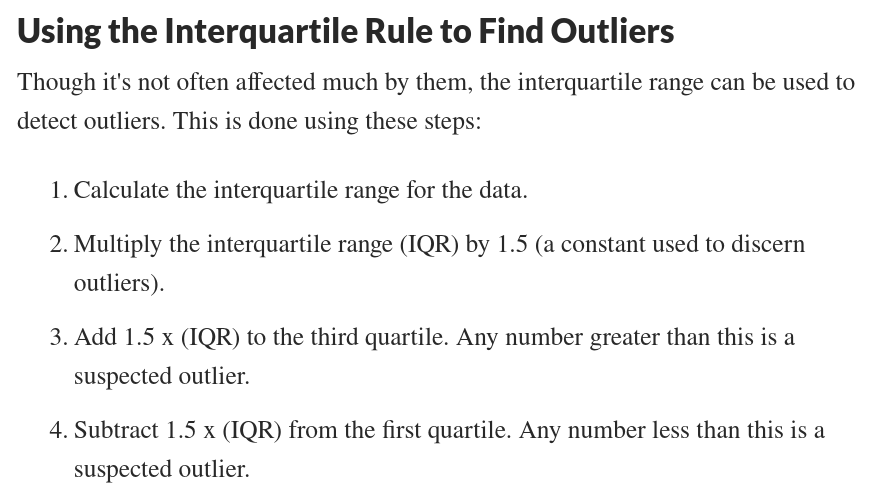
Source: https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244

In [144]:
def find_outliers(data):
    data = np.array(data.dropna())
    
    inter_quant = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    
    upper_bound = np.quantile(data, 0.75) + 1.5*inter_quant
    lower_bound = np.quantile(data, 0.25) - 1.5*inter_quant
    
    lower_outliers = data < lower_bound
    upper_outliers = data > upper_bound
    
    return pd.Series(lower_outliers | upper_outliers)

In [158]:
outliers = find_outliers(raw_data['funding_total_usd'])

outliers

0        False
1        False
2        False
3        False
4        False
         ...  
53578    False
53579    False
53580    False
53581    False
53582    False
Length: 53583, dtype: bool

Lets check if our desired outliers (small number) still exist or not.

In [184]:
raw_data[['funding_total_usd']].dropna().reset_index(drop=True)[~outliers]

,funding_total_usd
0,10000000.0
1,700000.0
2,3406878.0
3,2000000.0
4,41250.0
...,...
53578,1120000.0
53579,1587301.0
53580,114304.0
53581,18192.0


Nope, the interquartile method just remove the upper outliers. Which is in this context, it still possible for startup to get up to 1x10^10 usd fund, so lets keep the upper bound outliers. We will consider snother method to remove lower bound outliers. Let set a threshold for 100 usd, it means anything under 100 usd fund considered as invalid input.

In [210]:
valid_input = ~(raw_data['funding_total_usd'] < 10000)

raw_data[['funding_total_usd']][valid_input]

,funding_total_usd
0,10000000.0
1,700000.0
2,3406878.0
3,2000000.0
4,NaN
...,...
66363,1587301.0
66364,114304.0
66365,NaN
66366,18192.0
